# Set environment

In [18]:
library(dplyr)
library(ggplot2)
library(GGally)
library(reshape2)
library(gridExtra)

# Import Data

In [2]:
### download data form url
LIVER <- read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"), sep = ",")

### set column names
names(LIVER) <- c("Age", "Gender", "TotBili","DirectBili","ALK","AAP","AAP2","TP","ALB","A-GRatio","Disease")

### show the #{NA}
apply(LIVER, 2, function(x)sum(is.na(x)))
      
### omit NA
Liver <- na.omit(LIVER)

Age     Gender    TotBili DirectBili        ALK        AAP       AAP2 
         0          0          0          0          0          0          0 
        TP        ALB   A-GRatio    Disease 
         0          0          4          0

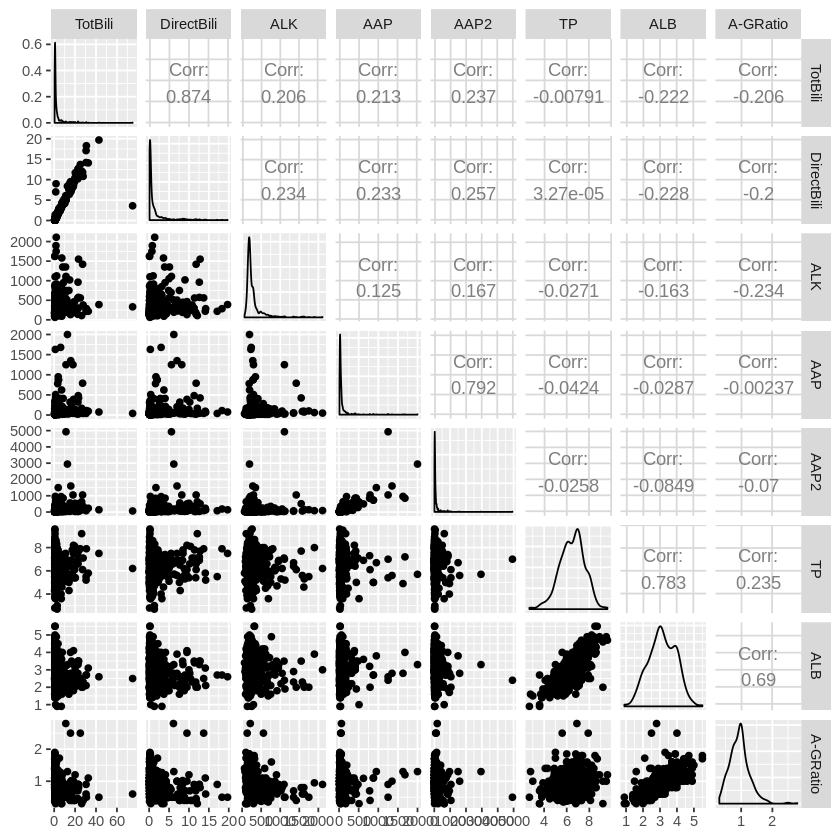

In [7]:
ggpairs(Liver[, 3:10])

# Principal component analysis

In [9]:
###First PCA 
pcaObj <- prcomp(Liver[,3:10], scale = T)
print(pcaObj)

Standard deviations (1, .., p=8):
[1] 1.6496513 1.3885766 1.1684830 0.9645037 0.8174284 0.4531472 0.3547092
[8] 0.2356601

Rotation (n x k) = (8 x 8):
                  PC1        PC2         PC3         PC4         PC5
TotBili     0.4318755 -0.2166866  0.45315822 -0.24648054  0.06238331
DirectBili  0.4387593 -0.2275505  0.44091771 -0.21726133  0.08030663
ALK         0.2555945 -0.0413018  0.10028992  0.84922255  0.44810419
AAP         0.2942504 -0.4053128 -0.50227953 -0.04248009 -0.04148055
AAP2        0.3239224 -0.3872823 -0.47902995  0.01784319 -0.11858200
TP         -0.2559977 -0.4711906  0.30330865  0.28577695 -0.51378048
ALB        -0.4170201 -0.4925763  0.12004228  0.08450579  0.01368362
A-GRatio   -0.3531227 -0.3473381 -0.04494916 -0.28272476  0.71338759
                     PC6          PC7          PC8
TotBili    -9.998467e-03  0.703722211 -0.034768054
DirectBili -7.879403e-06 -0.699880761  0.133483647
ALK        -1.790406e-02  0.022841309 -0.009430388
AAP        -6.977645e-01

In [10]:
summary(pcaObj)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6497 1.3886 1.1685 0.9645 0.81743 0.45315 0.35471
Proportion of Variance 0.3402 0.2410 0.1707 0.1163 0.08352 0.02567 0.01573
Cumulative Proportion  0.3402 0.5812 0.7519 0.8681 0.95166 0.97733 0.99306
                           PC8
Standard deviation     0.23566
Proportion of Variance 0.00694
Cumulative Proportion  1.00000

## PC loadings

In [11]:
pcloading <-  melt(pcaObj$rotation[,1:3])
names(pcloading) <- c("Lab","PC", "Value")
head(pcloading, n = 10)

Lab,PC,Value
TotBili,PC1,0.4318755
DirectBili,PC1,0.4387593
ALK,PC1,0.2555945
AAP,PC1,0.2942504
AAP2,PC1,0.3239224
TP,PC1,-0.2559977
ALB,PC1,-0.4170201
A-GRatio,PC1,-0.3531227
TotBili,PC2,-0.2166866
DirectBili,PC2,-0.2275505


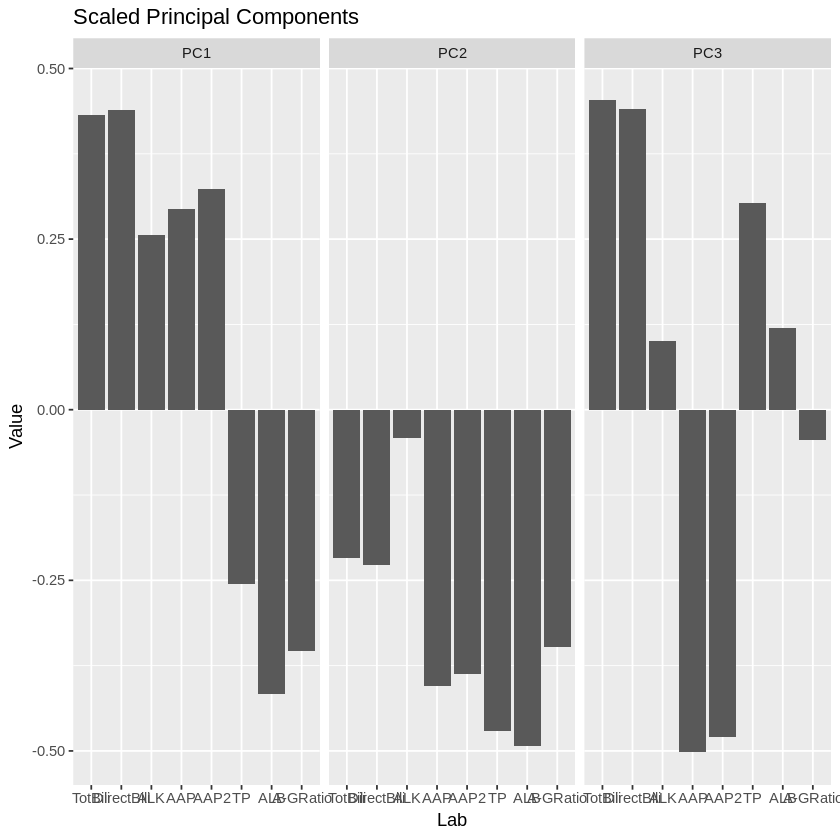

In [12]:
barplotSC <- ggplot(data=pcloading) +
  geom_bar(aes(x=Lab, y=Value), stat="identity", position = "identity") + 
  facet_wrap(~PC, nrow=1) + ggtitle("Scaled Principal Components")
barplotSC

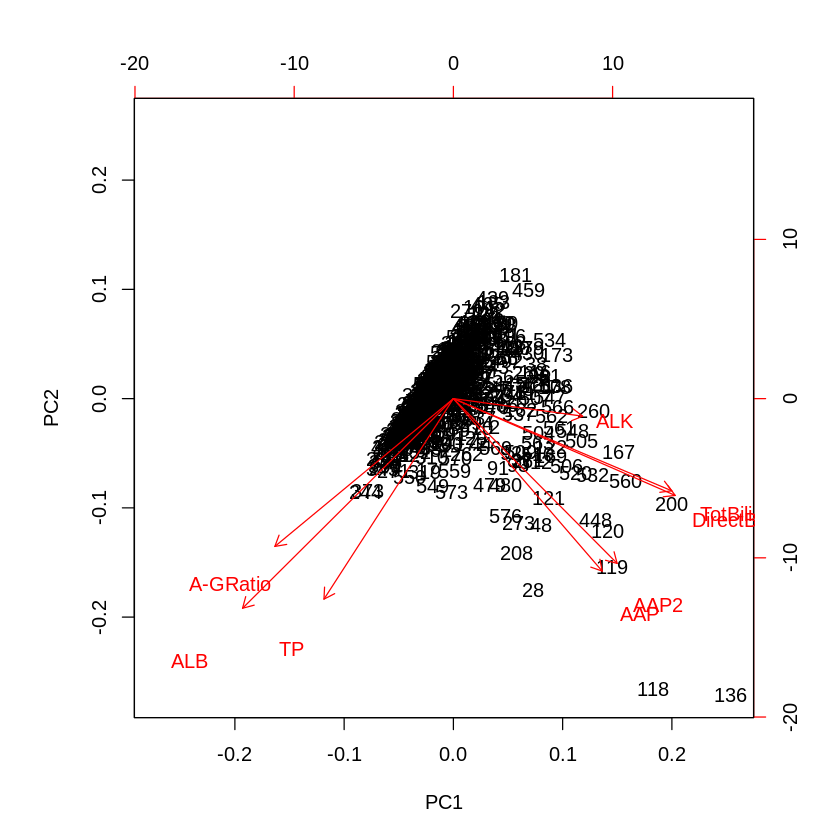

In [13]:
biplot(pcaObj, cex = 1)

## PC scores

In [15]:
pcpoints <- data.frame(Liver[,c("Age","Gender","Disease")],pcaObj$x)
pcpoints$Disease <- factor(pcpoints$Disease, levels = c(1,2), labels = c("Diseased", "Not Diseased"))
head(pcpoints)

Age,Gender,Disease,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
65,Female,Diseased,-0.8238557,0.30165346,-0.0001926795,-0.0007466233,-0.458457683,0.01209084,0.043166095,0.015588246
62,Male,Diseased,1.4948109,-0.86031302,1.7341976138,1.2734445658,0.004792488,-0.05597161,-0.125644826,-0.042167981
62,Male,Diseased,0.6653339,-0.54271353,1.0850658979,0.5403638209,0.131686283,-0.06626988,-0.185101366,0.064812931
58,Male,Diseased,-0.9255259,0.09889343,0.0697667912,-0.1304351733,-0.231522430,0.04875215,0.000804408,0.001286073
72,Male,Diseased,0.6728078,0.84055926,0.5096175576,0.2322308363,-1.745211009,-0.01350302,-0.131723416,-0.379103433
46,Male,Diseased,-1.8399211,-1.25424986,0.5144773244,-0.0443540353,0.142131381,0.04027013,0.047751121,0.190655503


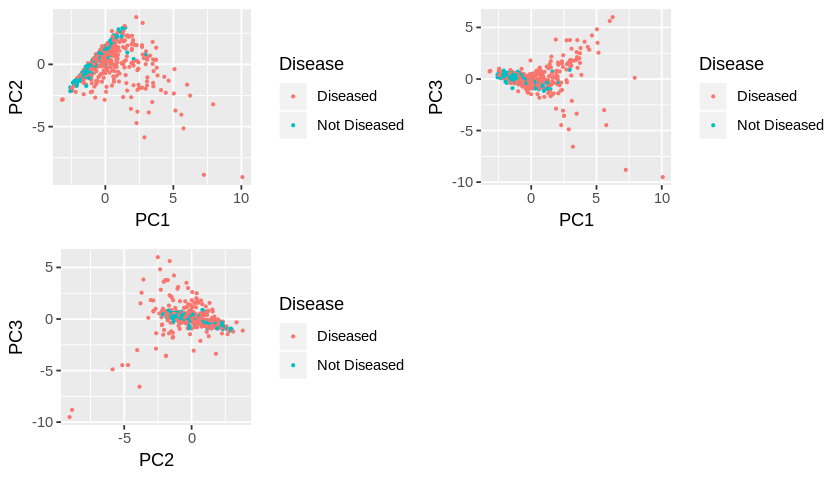

In [40]:
D1 <- qplot(x=PC1, y=PC2, data=pcpoints, colour=Disease, size=I(0.5)) + 
    theme(legend.position="right")

D2 <- qplot(x=PC1, y=PC3, data=pcpoints, colour=Disease, size=I(0.5)) +
  theme(legend.position="right")

D3 <- qplot(x=PC2, y=PC3, data=pcpoints, colour=Disease, size=I(0.5)) +
  theme(legend.position="right")

options(repr.plot.height = 4, repr.plot.weight = 7)
grid.arrange(D1, D2, D3, nrow = 2, ncol = 2)

# PCA vs SVD

In [42]:
####Compare PCA and SVD
LiverScale <- apply(Liver[,3:10], 2, scale)
head(LiverScale)
head(Liver[,3:10])

TotBili,DirectBili,ALK,AAP,AAP2,TP,ALB,A-GRatio
-0.41995671,-0.4949862,-0.4284995,-0.35552499,-0.31883559,0.2934680,0.20327072,-0.1472624
1.21788279,1.4222880,1.6736358,-0.09349172,-0.03593068,0.9388428,0.07739506,-0.6479006
0.63982179,0.9252169,0.8155376,-0.11532783,-0.14633260,0.4778608,0.20327072,-0.1785523
-0.37178496,-0.3884709,-0.4490282,-0.36644304,-0.31193547,0.2934680,0.32914639,0.1656364
0.09387529,0.1796103,-0.3956537,-0.29547570,-0.17738313,0.7544500,-0.92961029,-1.7117566
-0.24332696,-0.2819557,-0.3422792,-0.33914791,-0.33263583,1.0310392,1.58790307,1.1043330


TotBili,DirectBili,ALK,AAP,AAP2,TP,ALB,A-GRatio
0.7,0.1,187,16,18,6.8,3.3,0.90
10.9,5.5,699,64,100,7.5,3.2,0.74
7.3,4.1,490,60,68,7.0,3.3,0.89
1.0,0.4,182,14,20,6.8,3.4,1.00
3.9,2.0,195,27,59,7.3,2.4,0.40
1.8,0.7,208,19,14,7.6,4.4,1.30


In [51]:
SVD <- svd(LiverScale)
PCA <- prcomp(LiverScale)

D <- matrix(0, ncol = 8, nrow = 8)
diag(D) <- SVD$d

In [48]:
###Loadings
head(PCA$rotation)
head(SVD$v)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TotBili,0.4318755,-0.2166866,0.4531582,-0.24648054,0.06238331,-9.998467e-03,0.703722211,-0.034768054
DirectBili,0.4387593,-0.2275505,0.4409177,-0.21726133,0.08030663,-7.879403e-06,-0.699880761,0.133483647
ALK,0.2555945,-0.0413018,0.1002899,0.84922255,0.44810419,-1.790406e-02,0.022841309,-0.009430388
AAP,0.2942504,-0.4053128,-0.5022795,-0.04248009,-0.04148055,-6.977645e-01,-0.007012655,-0.080024156
AAP2,0.3239224,-0.3872823,-0.4790300,0.01784319,-0.11858200,7.047163e-01,0.020401520,0.064774008
TP,-0.2559977,-0.4711906,0.3033086,0.28577695,-0.51378048,2.082831e-02,-0.063050064,-0.520000433


0.4318755,-0.2166866,0.4531582,-0.24648054,0.06238331,-9.998467e-03,0.703722211,-0.034768054
0.4387593,-0.2275505,0.4409177,-0.21726133,0.08030663,-7.879403e-06,-0.699880761,0.133483647
0.2555945,-0.0413018,0.1002899,0.84922255,0.44810419,-1.790406e-02,0.022841309,-0.009430388
0.2942504,-0.4053128,-0.5022795,-0.04248009,-0.04148055,-6.977645e-01,-0.007012655,-0.080024156
0.3239224,-0.3872823,-0.4790300,0.01784319,-0.11858200,7.047163e-01,0.020401520,0.064774008
-0.2559977,-0.4711906,0.3033086,0.28577695,-0.51378048,2.082831e-02,-0.063050064,-0.520000433


In [50]:
###Scores
head(PCA$x)
cat("===================")
head(SVD$u %*% D)
cat("===================")
head(LiverScale %*% PCA$rotation)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
-0.8238557,0.30165346,-0.0001926795,-0.0007466233,-0.458457683,0.01209084,0.043166095,0.015588246
1.4948109,-0.86031302,1.7341976138,1.2734445658,0.004792488,-0.05597161,-0.125644826,-0.042167981
0.6653339,-0.54271353,1.0850658979,0.5403638209,0.131686283,-0.06626988,-0.185101366,0.064812931
-0.9255259,0.09889343,0.0697667912,-0.1304351733,-0.231522430,0.04875215,0.000804408,0.001286073
0.6728078,0.84055926,0.5096175576,0.2322308363,-1.745211009,-0.01350302,-0.131723416,-0.379103433
-1.8399211,-1.25424986,0.5144773244,-0.0443540353,0.142131381,0.04027013,0.047751121,0.190655503


-0.8238557,0.30165346,-0.0001926795,-0.0007466233,-0.458457683,0.01209084,0.043166095,0.015588246
1.4948109,-0.86031302,1.7341976138,1.2734445658,0.004792488,-0.05597161,-0.125644826,-0.042167981
0.6653339,-0.54271353,1.0850658979,0.5403638209,0.131686283,-0.06626988,-0.185101366,0.064812931
-0.9255259,0.09889343,0.0697667912,-0.1304351733,-0.231522430,0.04875215,0.000804408,0.001286073
0.6728078,0.84055926,0.5096175576,0.2322308363,-1.745211009,-0.01350302,-0.131723416,-0.379103433
-1.8399211,-1.25424986,0.5144773244,-0.0443540353,0.142131381,0.04027013,0.047751121,0.190655503


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
-0.8238557,0.30165346,-0.0001926795,-0.0007466233,-0.458457683,0.01209084,0.043166095,0.015588246
1.4948109,-0.86031302,1.7341976138,1.2734445658,0.004792488,-0.05597161,-0.125644826,-0.042167981
0.6653339,-0.54271353,1.0850658979,0.5403638209,0.131686283,-0.06626988,-0.185101366,0.064812931
-0.9255259,0.09889343,0.0697667912,-0.1304351733,-0.231522430,0.04875215,0.000804408,0.001286073
0.6728078,0.84055926,0.5096175576,0.2322308363,-1.745211009,-0.01350302,-0.131723416,-0.379103433
-1.8399211,-1.25424986,0.5144773244,-0.0443540353,0.142131381,0.04027013,0.047751121,0.190655503


In [52]:
###Standard Deviations
SVD$d^2/(nrow(SVD$u)-1)
PCA$sdev^2

[1] 2.72134926 1.92814500 1.36535261 0.93026733 0.66818913 0.20534236 0.12581863
[8] 0.05553568

[1] 2.72134926 1.92814500 1.36535261 0.93026733 0.66818913 0.20534236 0.12581863
[8] 0.05553568

More explanation:
- [Running PCA and SVD in R](http://genomicsclass.github.io/book/pages/pca_svd.html)
- [Relationship between SVD and PCA. How to use SVD to perform PCA?](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca)

# Additional Plots

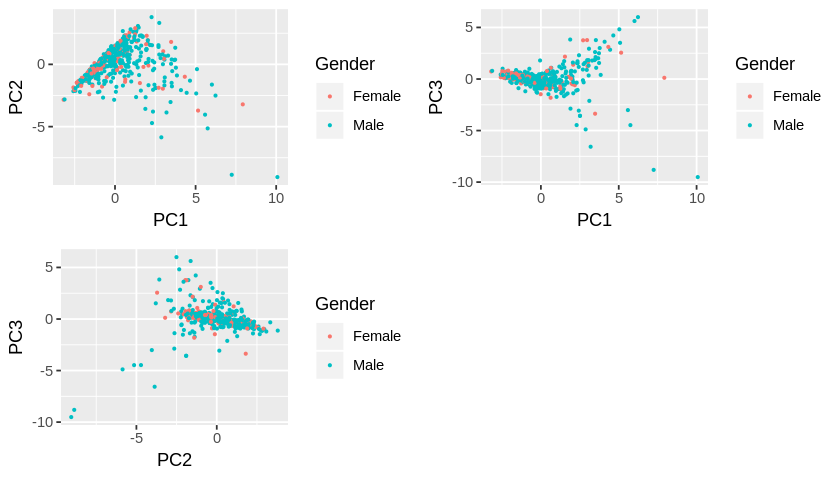

In [56]:
###Additional Plots
G1 <- qplot(x=PC1, y=PC2, data=pcpoints, colour=Gender, size = I(0.5)) +
  theme(legend.position="right")
G2 <- qplot(x=PC1, y=PC3, data=pcpoints, colour=Gender, size = I(0.5)) +
  theme(legend.position="right")
G3 <- qplot(x=PC2, y=PC3, data=pcpoints, colour=Gender, size = I(0.5)) +
  theme(legend.position="right")

grid.arrange(G1,G2,G3, ncol = 2)

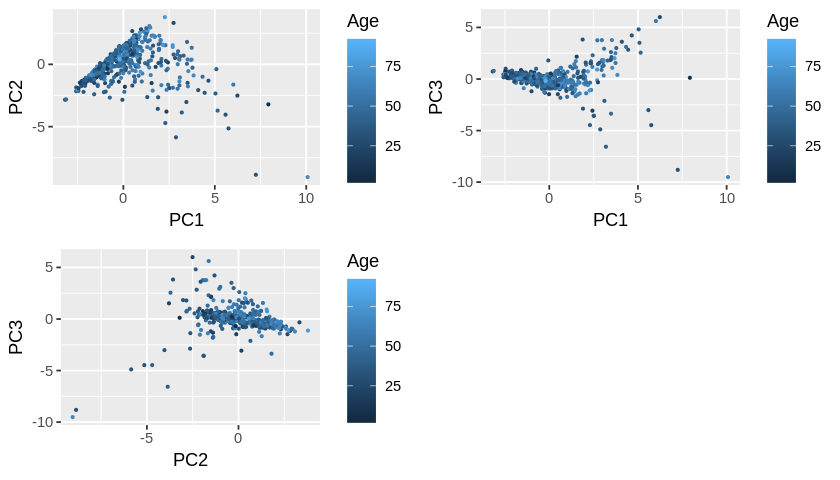

In [58]:
A1 <- qplot(x=PC1, y=PC2, data=pcpoints, colour=Age, size = I(0.5)) +
  theme(legend.position="right")
A2 <- qplot(x=PC1, y=PC3, data=pcpoints, colour=Age, size = I(0.5)) +
  theme(legend.position="right")
A3 <- qplot(x=PC2, y=PC3, data=pcpoints, colour= Age, size = I(0.5)) +
  theme(legend.position="right")
#multiplot(A1,A2,A3, cols = 2)
grid.arrange(A1, A2, A3, ncol = 2)

# Principal Components Regression

In [59]:
###Principal Components Regression
fitGLM <- glm(factor(Disease) ~ ., family = "binomial", data = LIVER[,3:11])
summary(fitGLM)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = factor(Disease) ~ ., family = "binomial", data = LIVER[, 
    3:11])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3747  -0.9326  -0.4003   1.1556   3.1374  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.3196729  1.2389670   1.872   0.0612 .
TotBili     -0.0112766  0.0841761  -0.134   0.8934  
DirectBili  -0.4750149  0.2420003  -1.963   0.0497 *
ALK         -0.0012074  0.0007753  -1.557   0.1194  
AAP         -0.0111639  0.0050381  -2.216   0.0267 *
AAP2        -0.0023166  0.0030832  -0.751   0.4524  
TP          -0.8931500  0.3780313  -2.363   0.0181 *
ALB          1.7395915  0.7396003   2.352   0.0187 *
`A-GRatio`  -1.7534121  1.1240458  -1.560   0.1188  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.01  on 578  degrees of freedom
Residual deviance: 576.37  on 570  degrees of freedom
  (4 observations

In [60]:
summary(glm(Disease ~ PC1 + PC2 + PC3, family = "binomial",data = pcpoints))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Disease ~ PC1 + PC2 + PC3, family = "binomial", 
    data = pcpoints)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2523  -0.9529  -0.4307   1.1955   3.2630  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.8576     0.2256  -8.234  < 2e-16 ***
PC1          -1.6182     0.2552  -6.340 2.29e-10 ***
PC2           1.2456     0.2720   4.580 4.66e-06 ***
PC3           0.3537     0.3781   0.935     0.35    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.01  on 578  degrees of freedom
Residual deviance: 583.40  on 575  degrees of freedom
AIC: 591.4

Number of Fisher Scoring iterations: 7


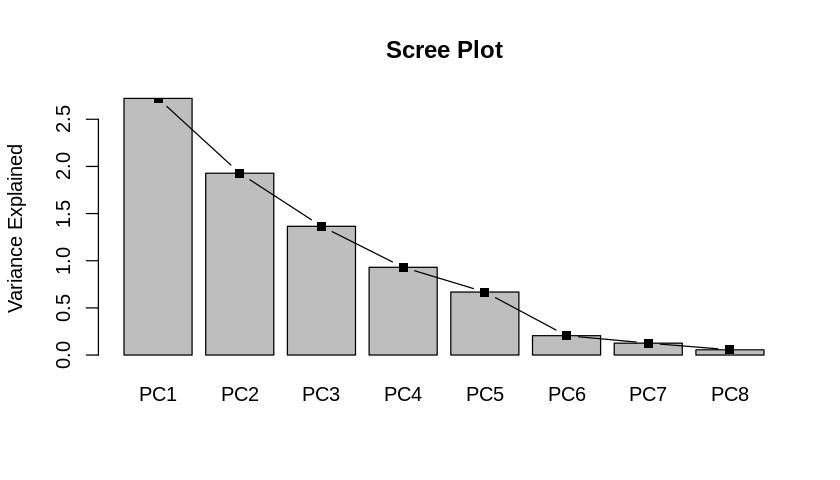

In [61]:
#### Scree Plot
PCAvar <- summary(pcaObj)$importance[1,]^2
bp <- barplot(PCAvar, main = "Scree Plot", ylab = "Variance Explained")
lines(bp, PCAvar,type = "b", pch = 15)

# Appendix

```
###Function to plot multiple gg-plots
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

```